# Tutorial 01

In [108]:
import numpy as np
import pandas as pd
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pingouin as pg

c:\Users\A200083283\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Task 1

In [2]:
film = pd.read_csv("../Data/film.csv")

In [7]:
film

,Man,Movie,fMan,fMovie
0,0,5,woman,highly negative
1,0,5,woman,highly negative
2,1,2,man,positive
3,0,2,woman,positive
4,0,4,woman,negative
...,...,...,...,...
1317,0,2,woman,positive
1318,1,3,man,neutral
1319,1,2,man,positive
1320,0,4,woman,negative


<AxesSubplot:xlabel='fMovie', ylabel='Count'>

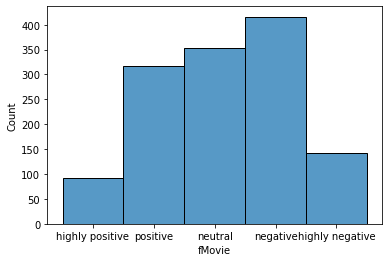

In [27]:
sns.histplot(film.sort_values("Movie"), x="fMovie")

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

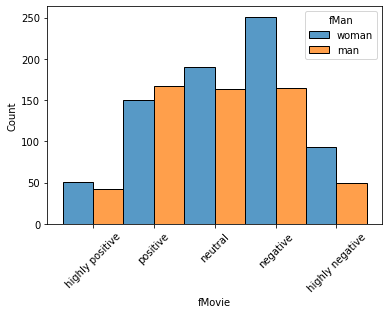

In [29]:
sns.histplot(film.sort_values("Movie"), x="fMovie", hue="fMan", multiple="dodge")
plt.xticks(rotation=45)

In [37]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [39]:
film.groupby('Man')['Movie'].quantile(np.arange(0.2, 1, 0.2))

Man     
0    0.2    2.0
     0.4    3.0
     0.6    4.0
     0.8    4.0
1    0.2    2.0
     0.4    3.0
     0.6    3.0
     0.8    4.0
Name: Movie, dtype: float64

In [33]:
film.groupby('Man')['Movie'].count()

Man
0    735
1    587
Name: Movie, dtype: int64

## Task 2

In [40]:
marriage = pd.read_csv("../Data/h_marriage.csv")

In [41]:
marriage

,ownhh,getmar
0,2,4
1,2,5
2,3,3
3,1,3
4,2,3
...,...,...
1341,5,2
1342,2,4
1343,2,1
1344,1,2


In [42]:
marriage.describe()

,ownhh,getmar
count,1346.000000,1346.000000
mean,2.348440,3.149331
std,1.147028,1.407622
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


<AxesSubplot:xlabel='ownhh'>

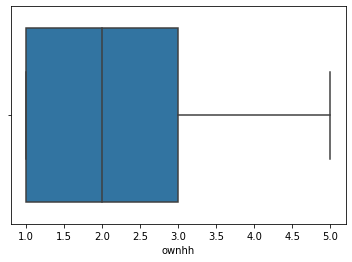

In [75]:
sns.boxplot(x=marriage['ownhh'])

<AxesSubplot:xlabel='getmar'>

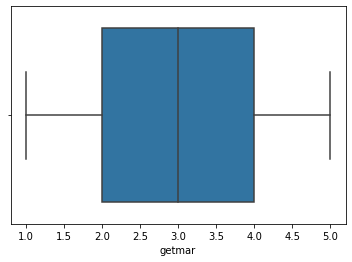

In [76]:
sns.boxplot(x=marriage['getmar'])

In [64]:
marriage['id'] = [i for i in range(len(marriage.ownhh))]
melt_mar = marriage.melt(['id'])

In [65]:
melt_mar

,id,variable,value
0,0,ownhh,2
1,1,ownhh,2
2,2,ownhh,3
3,3,ownhh,1
4,4,ownhh,2
...,...,...,...
2687,1341,getmar,2
2688,1342,getmar,4
2689,1343,getmar,1
2690,1344,getmar,2


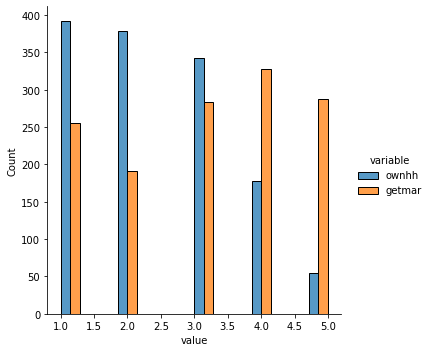

In [71]:
sns.displot(melt_mar, x="value", hue="variable", multiple="dodge")

In [86]:
marriage.loc[(marriage['getmar'] == marriage['ownhh'])].shape[0]/marria

300

In [87]:
r_pearson, p_val = stat.pearsonr(marriage['ownhh'], marriage['getmar'])
print(f"Correlation is {r_pearson} \nP_value of the zero correlation test is {p_val}")

Correlation is 0.08056845733470745 
P_value of the zero correlation test is 0.0030969366051704543


## Task 3

In [88]:
film

,Man,Movie,fMan,fMovie
0,0,5,woman,highly negative
1,0,5,woman,highly negative
2,1,2,man,positive
3,0,2,woman,positive
4,0,4,woman,negative
...,...,...,...,...
1317,0,2,woman,positive
1318,1,3,man,neutral
1319,1,2,man,positive
1320,0,4,woman,negative


In [105]:
t, pval = stats.ttest_ind(film.loc[film['Man']==1][['Movie']], film.loc[film['Man']==0][['Movie']])

print(f't_stat is {t[0]} \np_value is {pval[0]} \nEquality is rejected')

t_stat is -3.76395656706336 
p_value is 0.00017458789964738372 
Equality is rejected


## Task 04

In [106]:
educ = pd.read_csv("../Data/h_education.csv")

In [107]:
educ

,ownhh,degree,fdegree,fdegree4
0,1,0,<HS,<HS
1,1,0,<HS,<HS
2,1,0,<HS,<HS
3,1,0,<HS,<HS
4,1,0,<HS,<HS
...,...,...,...,...
1358,5,3,BA,BA
1359,5,3,BA,BA
1360,5,4,Grad,Grad
1361,5,4,Grad,Grad


In [111]:
anova = pg.anova(data=educ, dv="ownhh", between="fdegree4", detailed=True)
print(anova)

     Source           SS    DF        MS         F     p-unc       np2
0  fdegree4    16.077724     3  5.359241  4.103025  0.006549  0.008976
1    Within  1775.082951  1359  1.306168       NaN       NaN       NaN
